# Классификация
Общая методика: с помощью обучающего набора примеров из каждого класса найти правила, которые могут быть применены к новым примерам.

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt

# Data
В этой главе рассматривается классификация цветков ириса

In [9]:
data = load_iris()
features, target = data.data, data.target
features_names, target_names = data.feature_names, data.target_names
print(f'Названия признаков: {features_names}')
print(f'Названия классов: {target_names}')
print(f'Число объектов: {len(features)}')

Названия признаков: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Названия классов: ['setosa' 'versicolor' 'virginica']
Число объектов: 150


# EDA
Визуализация - отличные инструмент начального исследовательского этапа анализа, поскольку дает возможность уяснить общих характер задачи и уже на ранних стадиях выявить возможные проблемы или закономерности

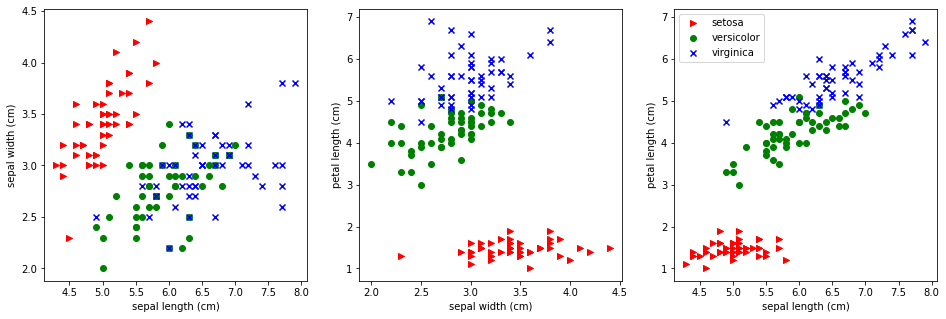

In [33]:
fig, axs = plt.subplots(1, 3, figsize=(16, 5))
for i, (f1, f2) in enumerate([(0, 1), (1, 2), (0, 2)]):
    for t in range(3):
        if t == 0:
            color = 'r'
            marker = '>'
        elif t == 1:
            color = 'g'
            marker = 'o'
        elif t == 2:
            color = 'b'
            marker = 'x'
        axs[i].scatter(features[target==t, f1],
                       features[target==t, f2],
                       marker=marker, c=color)
        
        axs[i].set_xlabel(features_names[f1])
        axs[i].set_ylabel(features_names[f2])
plt.legend(target_names)

Нетрудно заметить, что почти везде выделяются две группы:
(versicolor, virginica) и (setosa)

# Простой классификатор
Отличить setosa очень просто: она имеет меньший petal length

In [45]:
features_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [46]:
# строковые метки наших объектов в нужном порядке
labels = target_names[target]
# массив булевых значений
setosa = (labels=='setosa')
petal_length = features[:, 2]

# нахождения наибольшей длины лепестка среди ирисов класса setosa
max_setosa = petal_length[setosa].max()
# нахождения наименьшей длины лепестка среди ирисов класса НЕ setosa
min_non_setosa = petal_length[~setosa].min()

print('Наибольшая длина лепестка среди ирисов класса setosa: ', max_setosa)
print('Наименьшая длина лепестка среди ирисов класса НЕ setosa: ', min_non_setosa)

Наибольшая длина лепестка среди ирисов класса setosa:  1.9
Наименьшая длина лепестка среди ирисов класса НЕ setosa:  3.0


Теперь можно построить классификатор, отделяющий setosa от двух других классов: если длина лепестка больше 2, то объект является setosa. Иначе - virginica или versicolor

In [51]:
features_no_setosa = features[~setosa]
labels_no_setosa = labels[~setosa]
virginica = (labels_no_setosa == 'virginica')

In [53]:
best_acc = -10
for fi in range(features_no_setosa.shape[1]):
    # будет проверка всех пороговых значений
    feature = features_no_setosa[:, fi]
    for threshold in feature:
        # вектор признака fi
        pred = (feature > threshold)
        # точность для класса virginica
        accuracy = (pred == virginica).mean()
        # точность для класса versicolor
        rev_accuracy = (pred == ~virginica).mean()
        if rev_accuracy > accuracy:
            reverse = True
            accuracy = rev_accuracy
        else:
            reverse = False
        if accuracy > best_acc:
            best_acc = accuracy
            best_threshold = threshold
            best_feature = fi
            best_reverse = reverse
print(f'Лучший признак для разделения versicolor и virginica: {best_feature}')
print(f'Граница: {best_threshold}')
print(f'Точность: {best_acc}')

Лучший признак для разделения versicolor и virginica: 3
Граница: 1.6
Точность: 0.94


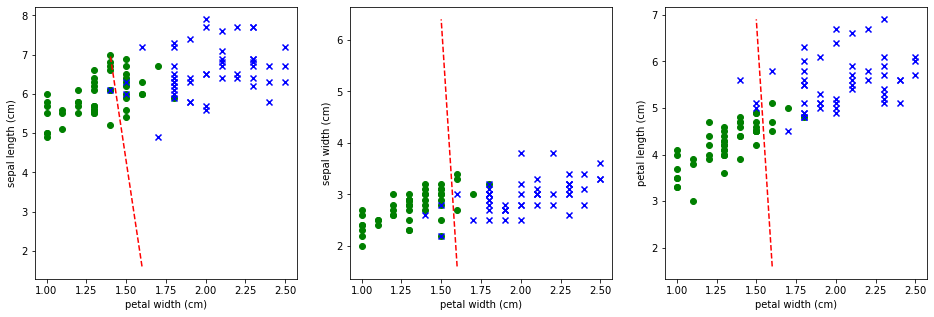

In [96]:
fig, axs = plt.subplots(1, 3, figsize=(16, 5))
for i, (f1, f2) in enumerate([(3, 0), (3, 1), (3, 2)]):
    for t in range(1, 3):
        if t == 1:
            color = 'g'
            marker = 'o'
        elif t == 2:
            color = 'b'
            marker = 'x'
        axs[i].scatter(features_no_setosa[labels_no_setosa==target_names[t], f1],
                       features_no_setosa[labels_no_setosa==target_names[t], f2],
                       marker=marker, c=color)
        axs[i].set_xlabel(features_names[f1])
        axs[i].set_ylabel(features_names[f2])
    axs[i].plot([best_threshold, min(features_no_setosa[f2])],
                [best_threshold, max(features_no_setosa[f2])],
                'r--')